# Importing the relevant libraries

In [1]:
# Step 1: Import the pandas library as pd
import pandas as pd

# Step 2: Load the data file into a pandas DataFrame
# Replace 'ml_datasource.csv' with the actual path or name of your CSV file
raw_data = pd.read_csv('ml_datasource.csv')

# Step 3: Display the first five records of the DataFrame
print("First five records of the dataset:")
print(raw_data.head())

# Step 4: Copy the raw data into a new variable to avoid modifying the original
data = raw_data.copy()


First five records of the dataset:
  student_country  days_on_platform  minutes_watched  courses_started  \
0              US               288            358.1                1   
1              SG               260              1.7                1   
2              TR               260             22.4                1   
3              KE               259             18.8                1   
4              IN               259            118.0                2   

   practice_exams_started  practice_exams_passed  minutes_spent_on_exams  \
0                       2                      2                   15.81   
1                       1                      0                   16.00   
2                       1                      0                    0.93   
3                       1                      1                   14.63   
4                       2                      1                   16.48   

   purchased  
0          0  
1          0  
2          0  
3        

In [2]:
data.head(5)

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


# Data Preprocessing

### Importing the Database

In [3]:
# Step 1: Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns



### Removing Outliers

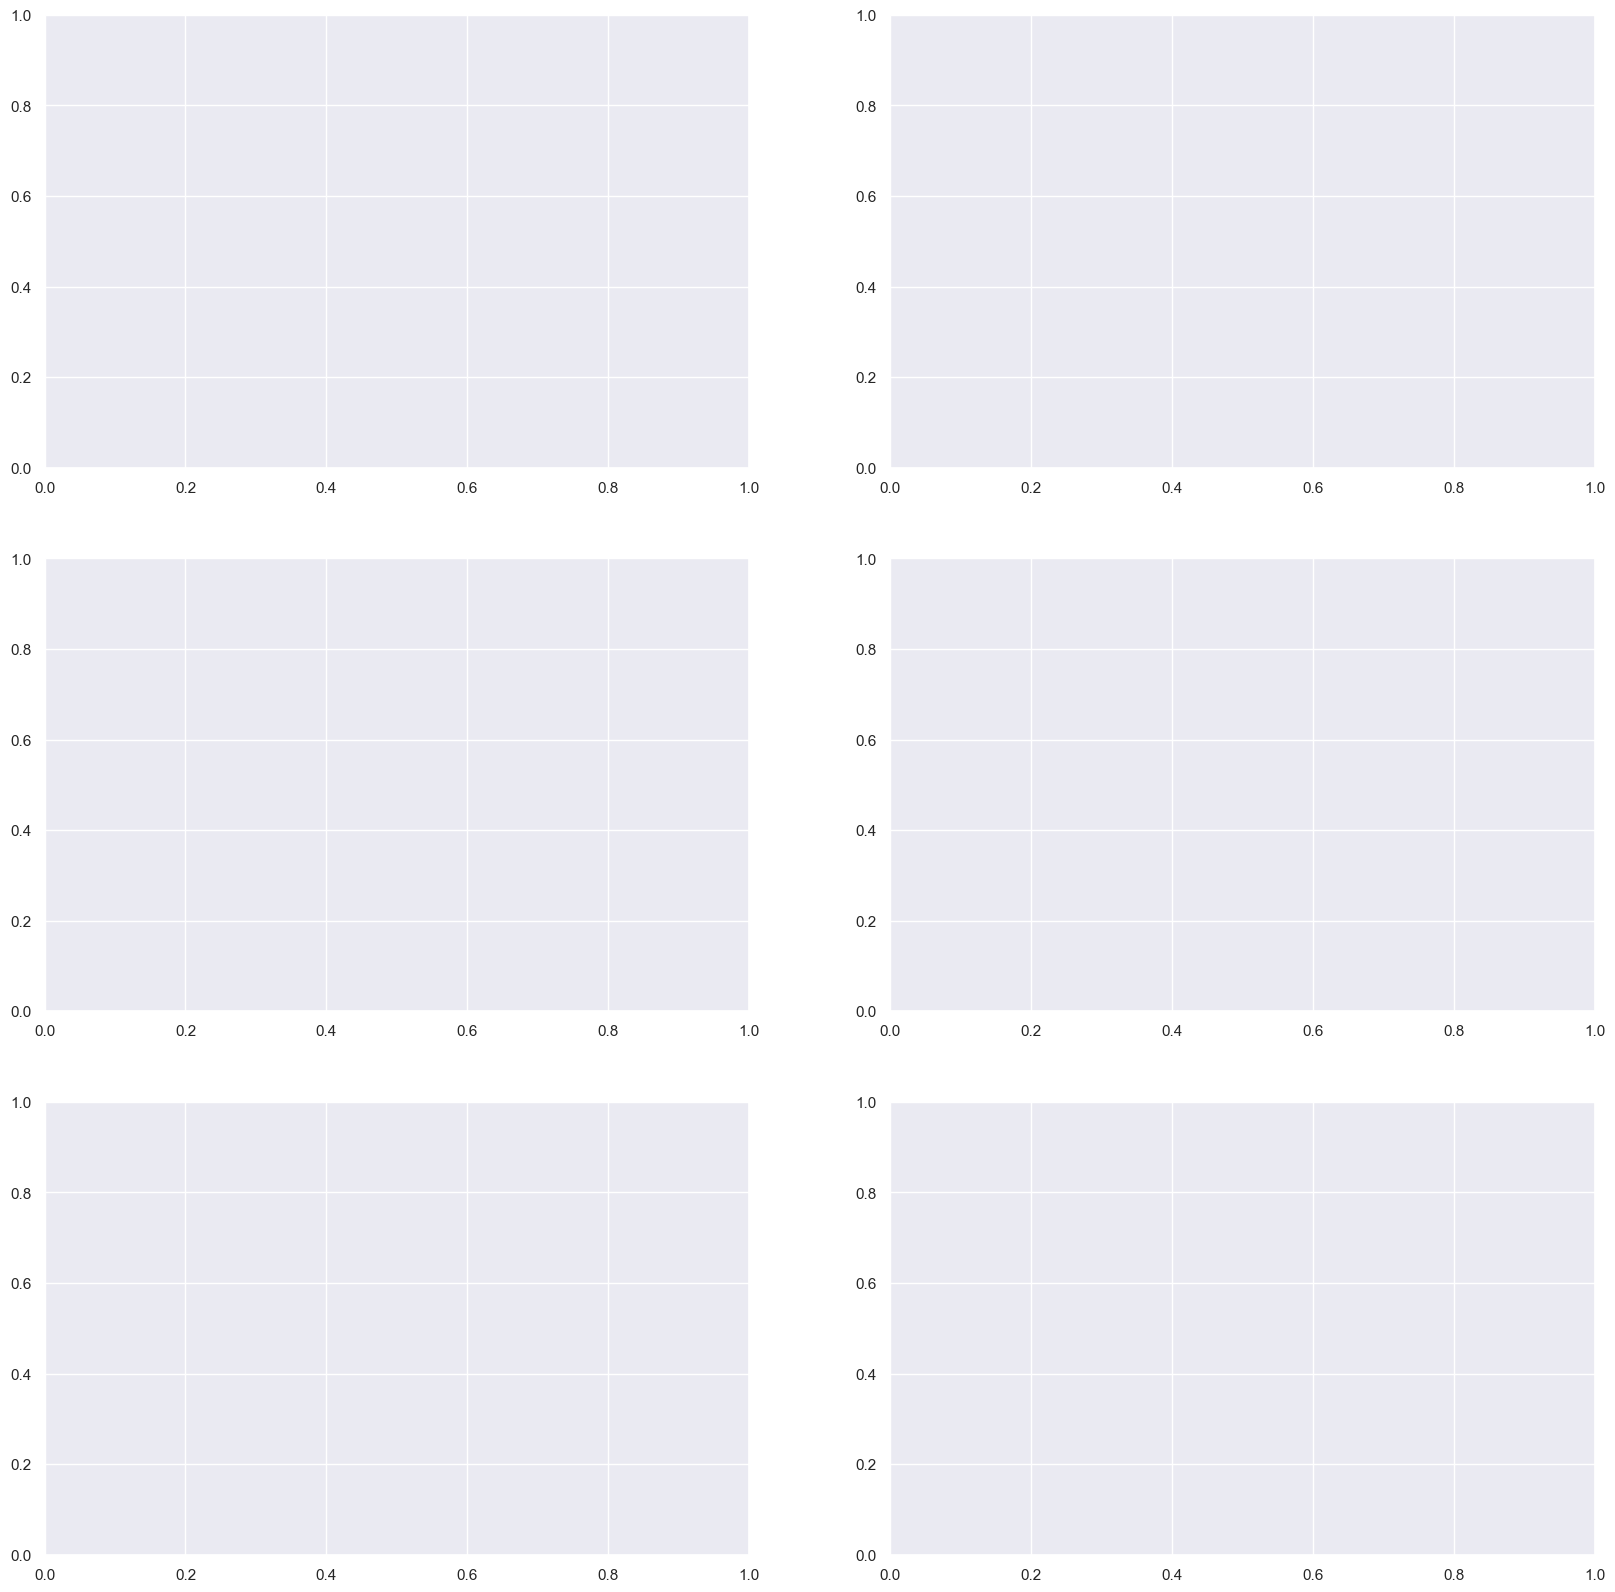

In [4]:
# Step 2: Set the default seaborn theme for plots
sns.set()

# Step 3: Analyze distributions of numerical features using kdeplot
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

# Assuming the DataFrame `data` contains these columns
numerical_features = ['minutes_watched', 'courses_started', 
                      'practice_exams_started', 'minutes_spent_on_exams']



In [5]:
# Plot each feature's distribution
for i, feature in enumerate(numerical_features):
    row, col = divmod(i, 2)
    sns.kdeplot(data[feature], ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()




<Figure size 640x480 with 0 Axes>

In [6]:
# Step 4: Remove outliers using Boolean indexing
data_no_outliers = data[
    (data['minutes_watched'] <= 1000) &
    (data['courses_started'] <= 10) &
    (data['practice_exams_started'] <= 10) &
    (data['minutes_spent_on_exams'] <= 40)
]


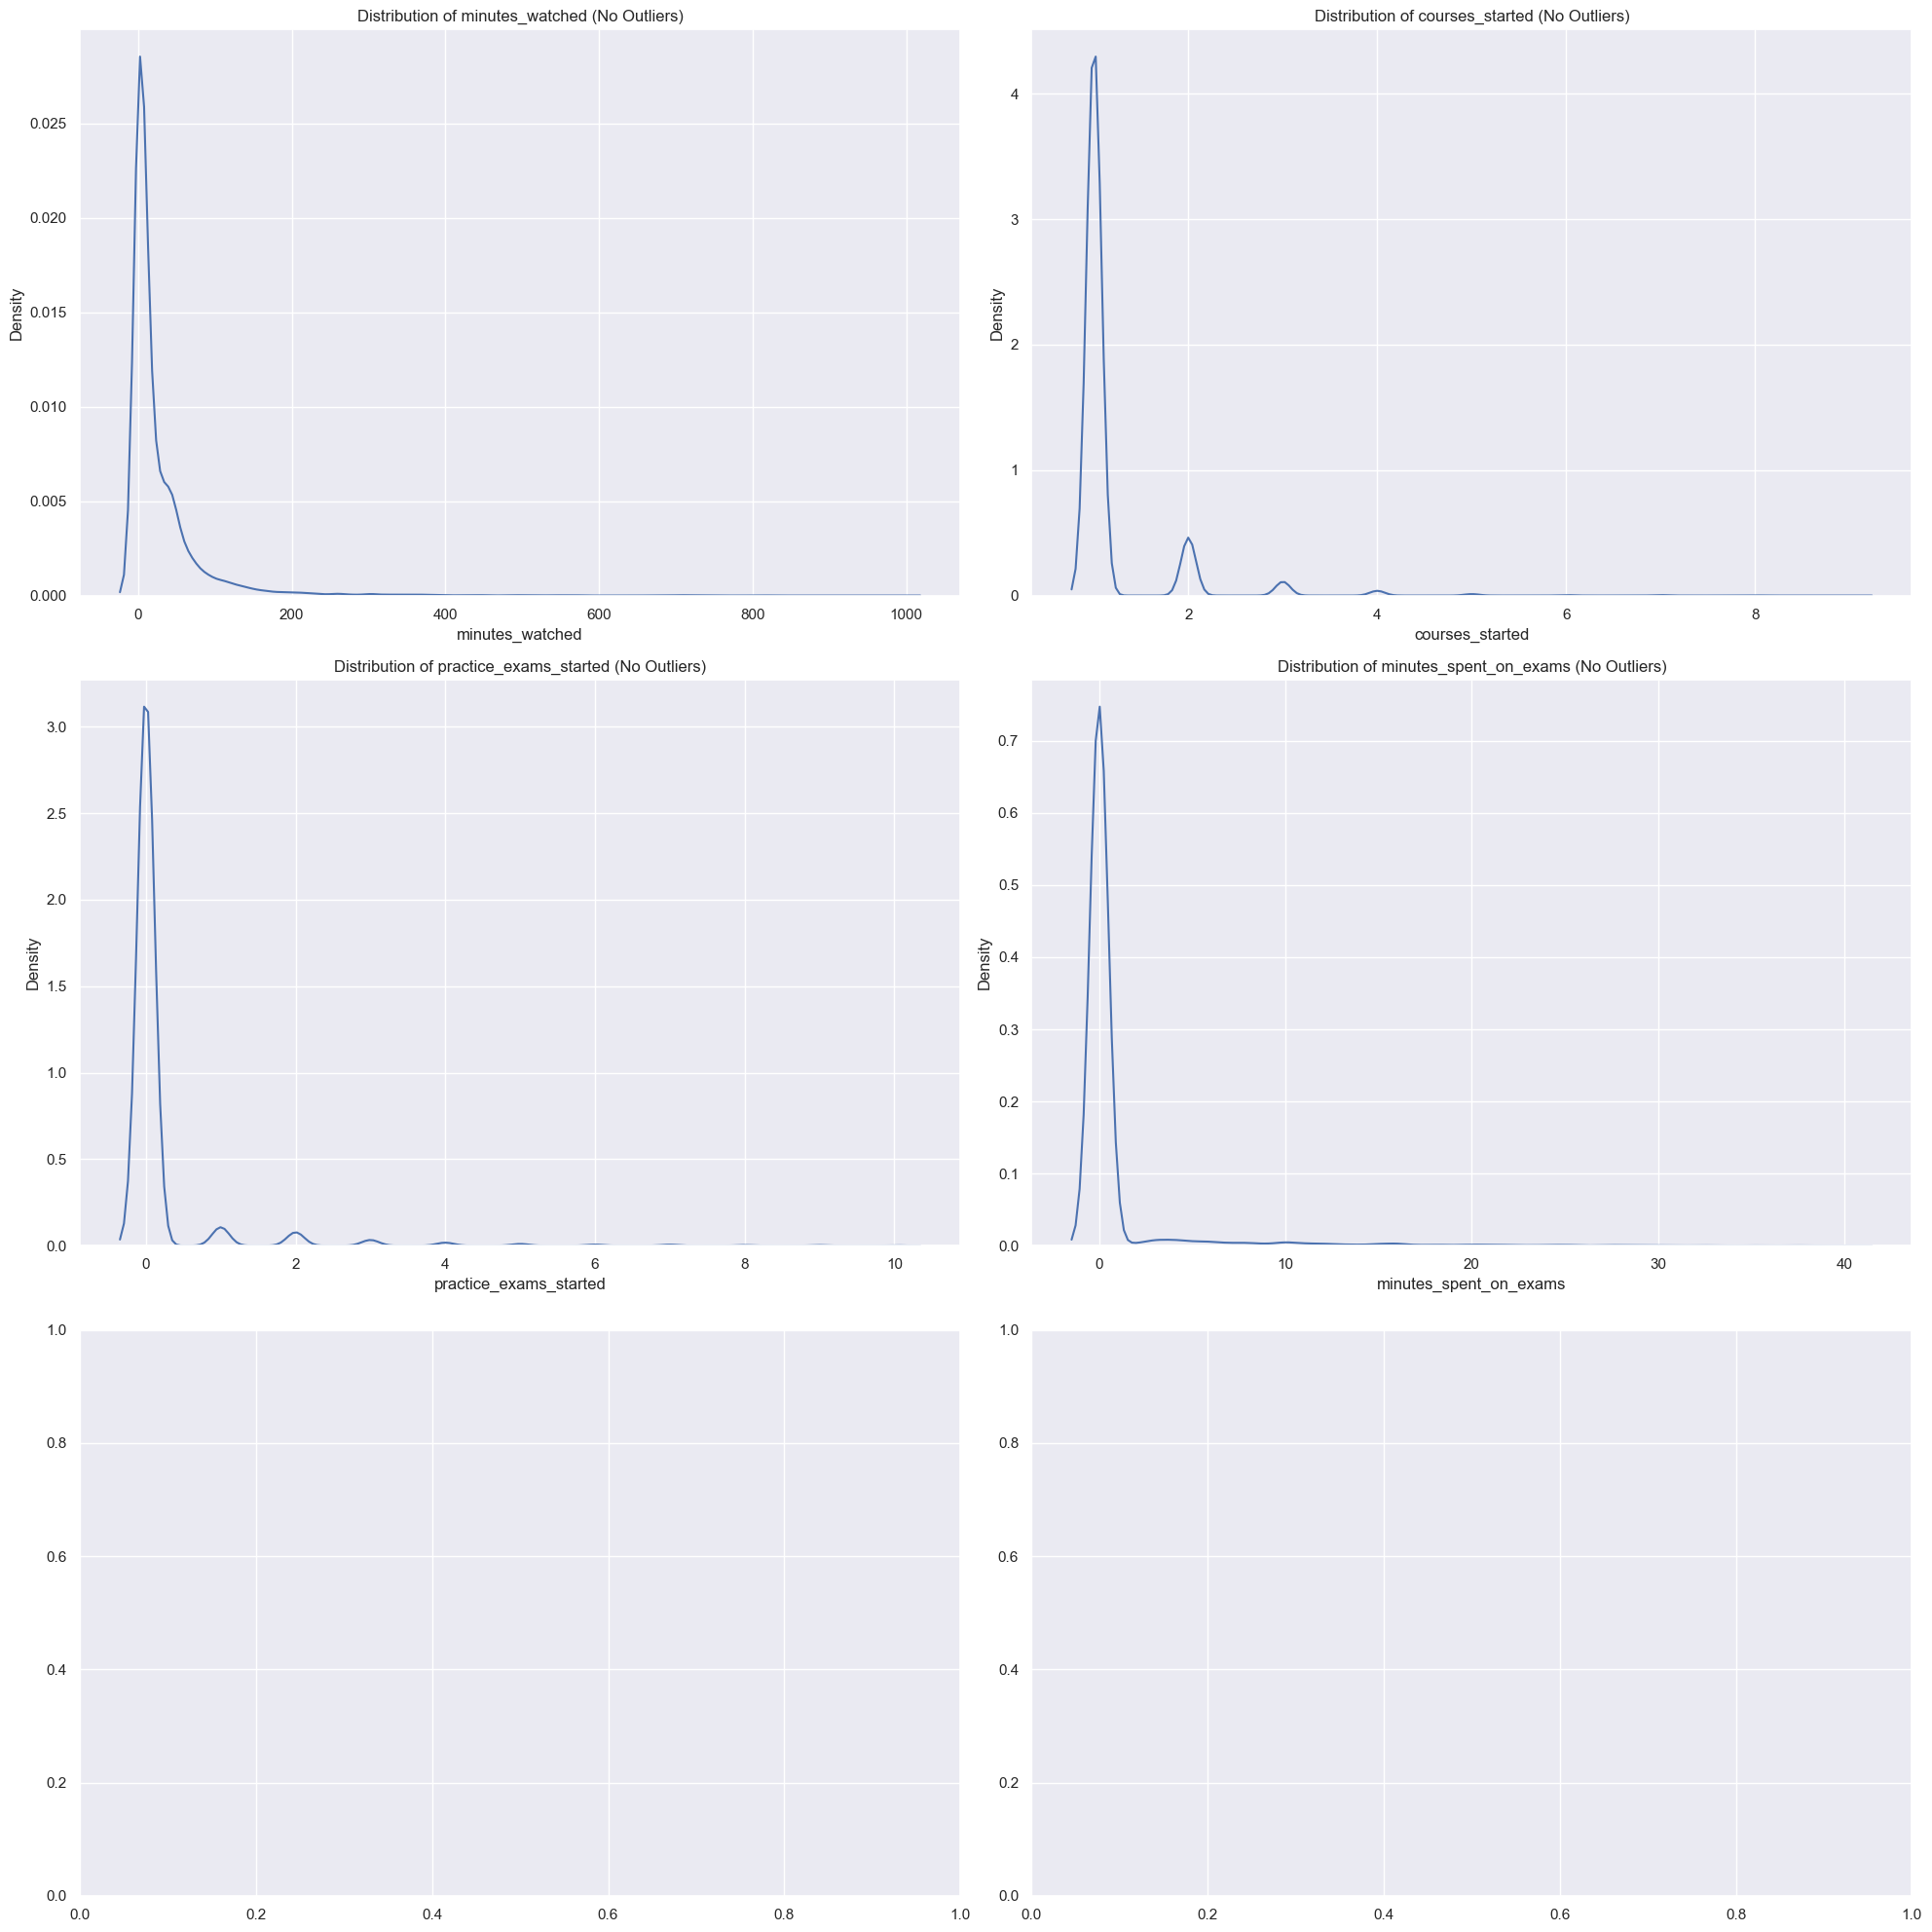

In [7]:

# Step 5: Visualize distributions without outliers
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

for i, feature in enumerate(numerical_features):
    row, col = divmod(i, 2)
    sns.kdeplot(data_no_outliers[feature], ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature} (No Outliers)')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### Checking for Multicollinearity

In [9]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [10]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data


In [12]:
print(data.dtypes)


student_country            object
days_on_platform            int64
minutes_watched           float64
courses_started             int64
practice_exams_started      int64
practice_exams_passed       int64
minutes_spent_on_exams    float64
purchased                   int64
dtype: object


In [14]:
# Find rows with NaN values
print(data.isnull().sum())

# Drop rows with NaN values (if appropriate)
data = data.dropna()

# Or fill NaN values with a default value
data = data.fillna(0)


student_country           9
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_started    0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd

# Supposons que "data" contient vos données.
while True:
    # Calculer les VIF
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data.select_dtypes(include=[np.number]).columns
    vif_data["VIF"] = [
        variance_inflation_factor(data.select_dtypes(include=[np.number]).values, i)
        for i in range(data.select_dtypes(include=[np.number]).shape[1])
    ]

    # Trouver le VIF le plus élevé
    max_vif = vif_data[vif_data["VIF"] > 5].sort_values(by="VIF", ascending=False)
    if max_vif.empty:  # Si aucune variable avec VIF > 5
        break

    # Supprimer la variable avec le VIF le plus élevé
    variable_to_remove = max_vif.iloc[0]["Variable"]
    print(f"Removing: {variable_to_remove} with VIF: {max_vif.iloc[0]['VIF']}")
    data = data.drop(columns=[variable_to_remove])

# Résultat final
print("Final VIFs:")
print(vif_data)


Removing: practice_exams_started with VIF: 7.780740659837167
Final VIFs:
                 Variable       VIF
0        days_on_platform  2.373235
1         minutes_watched  2.156488
2         courses_started  3.280321
3   practice_exams_passed  3.004784
4  minutes_spent_on_exams  3.002401
5               purchased  1.185078


### Dealing with NaN Values

In [20]:
data.isnull().sum()


student_country           0
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [21]:
data.loc[data['student_country'].isna()]


,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,purchased


In [22]:
data['student_country'] = data['student_country'].fillna('NAM')


In [30]:
data.dtypes

student_country            object
days_on_platform            int64
minutes_watched           float64
courses_started             int64
practice_exams_passed       int64
minutes_spent_on_exams    float64
purchased                   int64
dtype: object

### Splitting the Data

In [23]:
# Séparer les entrées et la cible
X = data.drop('purchased', axis=1)  # Inputs : toutes les colonnes sauf 'purchased'
y = data['purchased']              # Target : uniquement la colonne 'purchased'


In [31]:
from sklearn.model_selection import train_test_split


In [32]:
x_train, x_test, y_train, y_test = train_test_split(
    X,     # Données d'entrée
    y,     # Cible
    test_size=0.2,       # Taille de l'ensemble de test (20 %)
    random_state=365,    # Graine aléatoire
    stratify=y           # Répartition stratifiée de la cible
)


In [33]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (14201, 6)
x_test shape: (3551, 6)
y_train shape: (14201,)
y_test shape: (3551,)


### Encoding the Data

In [34]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Initialisation de l'encodeur
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=170)


In [35]:
x_train['student_country_enc'] = enc.fit_transform(x_train['student_country'].to_numpy().reshape(-1, 1))


In [36]:
x_test['student_country_enc'] = enc.transform(x_test['student_country'].to_numpy().reshape(-1, 1))


In [37]:
x_train = x_train.drop(columns=['student_country'])
x_test = x_test.drop(columns=['student_country'])


In [38]:
x_train_array = np.asarray(x_train, dtype='float')
y_train_array = np.asarray(y_train, dtype='int')
x_test_array = np.asarray(x_test, dtype='float')
y_test_array = np.asarray(y_test, dtype='int')


In [39]:
x_train_array.dtype

dtype('float64')

# Creating a Logistic Regression Model

In [40]:
import statsmodels.api as sm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import numpy as np


In [41]:
# Initialize the logistic regression model
log_reg = sm.Logit(y_train_array, x_train_array)


In [42]:
# Fit the model
log_reg_results = log_reg.fit()


Optimization terminated successfully.
         Current function value: 0.160367
         Iterations 10


In [43]:
# Display the summary
print(log_reg_results.summary())


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                14201
Model:                          Logit   Df Residuals:                    14195
Method:                           MLE   Df Model:                            5
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.4772
Time:                        20:55:49   Log-Likelihood:                -2277.4
converged:                       True   LL-Null:                       -4356.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0664      0.002    -32.260      0.000      -0.070      -0.062
x2             0.0091      0.001     15.451      0.000       0.008       0.010
x3            -0.1234      0.058     -2.132      0.0

In [44]:
# Get probabilities of the positive class
y_pred_prob = log_reg_results.predict(x_test_array)


In [45]:
# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)


In [46]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_array, y_pred)


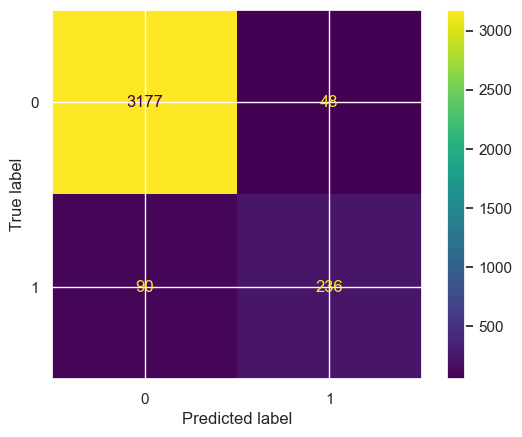

In [47]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot()


# Creating a K-Nearest Neighbors Model

In [48]:
parameters_knn = {
    'n_neighbors': range(1, 51),
    'weights': ['uniform', 'distance']
}


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [50]:
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=parameters_knn,
    scoring='accuracy',
    cv=5  # 5-fold cross-validation
)


In [51]:
grid_search_knn.fit(x_train_array, y_train_array)


c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [52]:
knn_clf = grid_search_knn.best_estimator_
print(f"Meilleurs paramètres : {grid_search_knn.best_params_}")


Meilleurs paramètres : {'n_neighbors': 11, 'weights': 'uniform'}


In [53]:
y_test_pred_knn = knn_clf.predict(x_test_array)


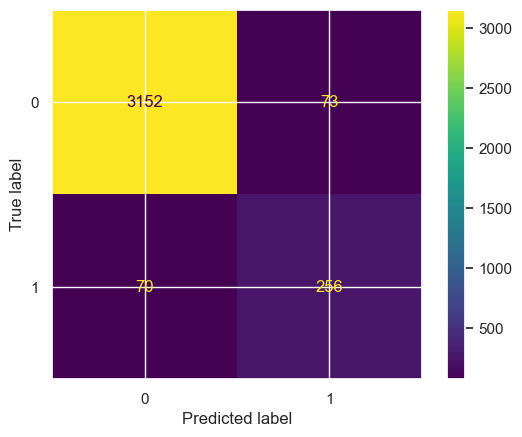

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_knn)


In [55]:
print(classification_report(y_test_array, y_test_pred_knn, target_names=["Non-abonnement", "Abonnement"]))


                precision    recall  f1-score   support

Non-abonnement       0.98      0.98      0.98      3225
    Abonnement       0.78      0.79      0.78       326

      accuracy                           0.96      3551
     macro avg       0.88      0.88      0.88      3551
  weighted avg       0.96      0.96      0.96      3551



# Creating a Support Vector Machines Model

# Creating a Decision Trees Model

# Creating a Random Forests Model